In [ ]:
pip install pandas pymongo


In [ ]:
pip install xgboost


In [ ]:
pip install imbalanced-learn


In [ ]:


import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import xgboost as xgb

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
##from sklearn.preprocessing import  RobustScaler

from sklearn.preprocessing import PowerTransformer

#from sklearn.manifold import TSNE
#from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn import svm
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import linear_model

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


#Importation des données

In [ ]:
import pandas as pd


df = pd.read_csv('creditcard.csv')
print(df.head())

      Time        V1        V2       V3        V4        V5        V6  \
0 0.000000 -1.359807 -0.072781 2.536347  1.378155 -0.338321  0.462388   
1 0.000000  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361   
2 1.000000 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499   
3 1.000000 -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203   
4 2.000000 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.311169  1.468177 -0.470401  0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
df.isnull().values.any()

False

#Vérification des valeurs manquantes

In [ ]:

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.000000
V16,0,0.000000
Amount,0,0.000000
V28,0,0.000000
V27,0,0.000000
V26,0,0.000000
V25,0,0.000000
V24,0,0.000000
V23,0,0.000000
V22,0,0.000000


# Visualisation des données

In [ ]:
#calculer lepourcentage des transactions classées comme « frauduleuses » et « non frauduleuses »
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("non frauduleuses : {} %".format(normal_share))
print("    frauduleuses : {} %".format(fraud_share))

non frauduleuses : 99.83 %
    frauduleuses : 0.17 %


In [ ]:
#le pourcentage de transactions légitimes et frauduleuses dans l'ensemble de données, et calcule du pourcentage de déséquilibre entre les deux.
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Normal_share= 99.82725143693798 
 Fraud_share= 0.1727485630620034
 Imbalance Percentage = 0.173047500131896


<Figure size 2000x600 with 0 Axes>

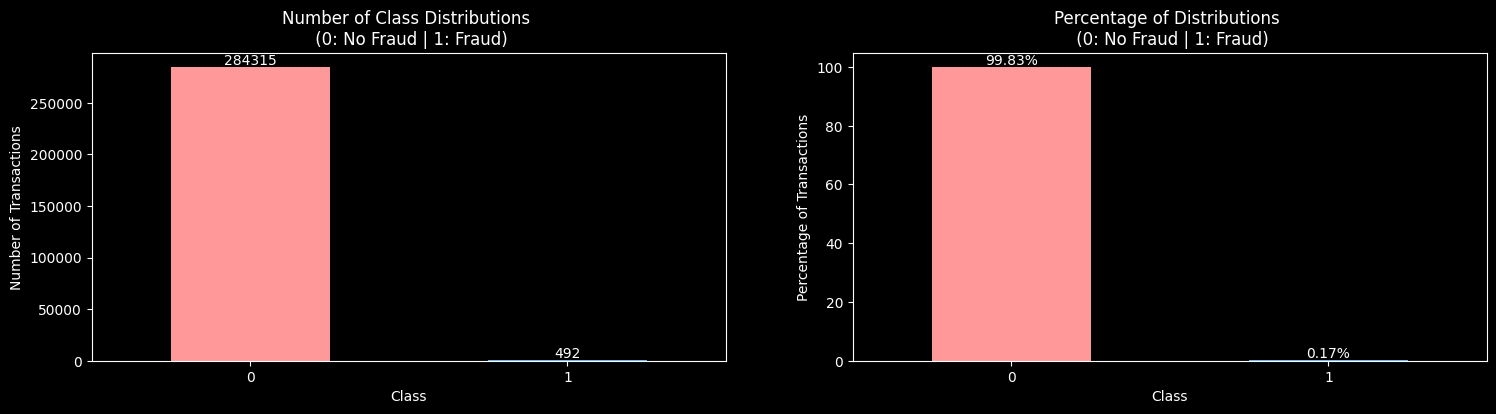

In [ ]:


with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='white')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0], color=['#ff9999', '#66b3ff'])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')

    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1], color=['#ff9999', '#66b3ff'])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')

    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()

In [ ]:

df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [ ]:
# y= #class variable
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 29))

#Division des données'Train-Test Split'


In [ ]:

#Division des données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [ ]:
# Checking the split of the class label
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))


 Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  394
 Fraudulent Count for Test data :  98


In [ ]:
# Save the testing set for evaluation
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()


#Mise à l'échelle des données

In [ ]:
#Application dy  RobustScaler Scaler
scaler = RobustScaler()

#  train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transformation de test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

#Vérification et gestion de l'asymétrie

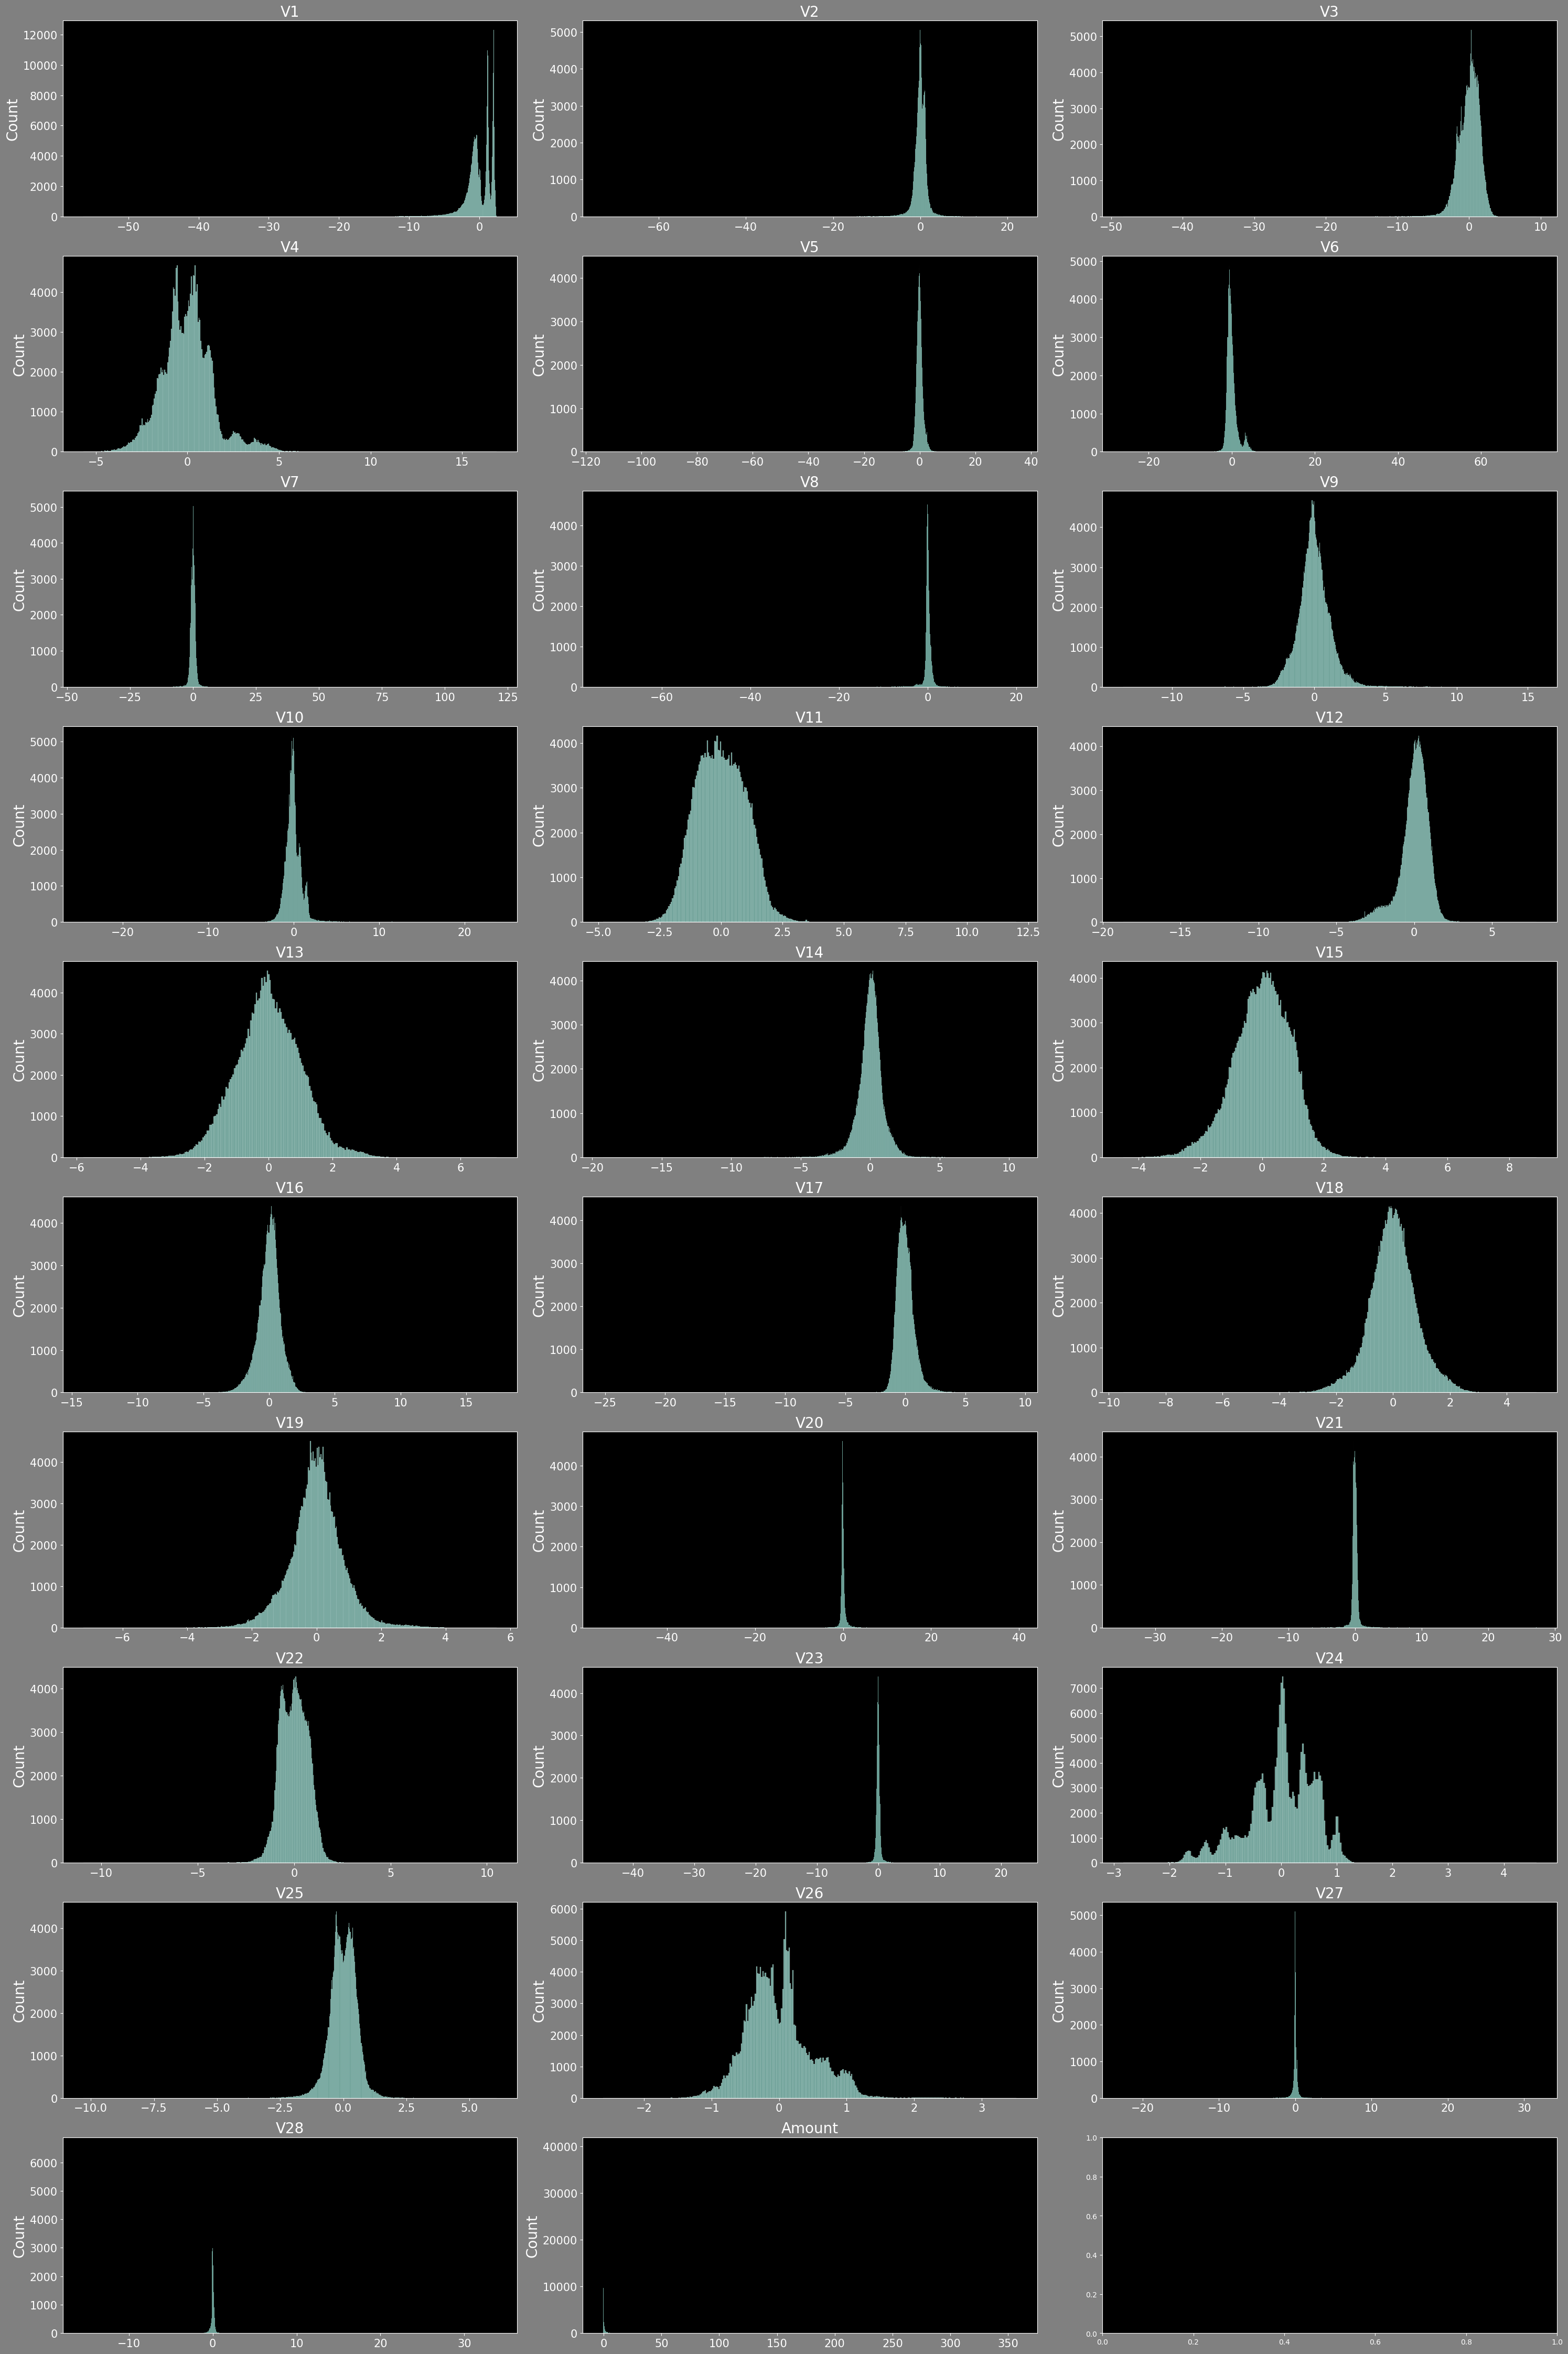

In [ ]:
#histogrammes des variables de l'ensemble de données pour voir si nous avons une asymétrie.

var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='grey')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20)
            ax.set_ylabel("Count", fontsize=20)
            ax.tick_params(axis='both', labelsize=15)
            ax.set_xlabel('')

    plt.tight_layout()
    plt.show()

In [ ]:
# l'étude d'asymétrie pour les caréctéristiques


var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


In [ ]:

# prétraitement avec power transformer
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

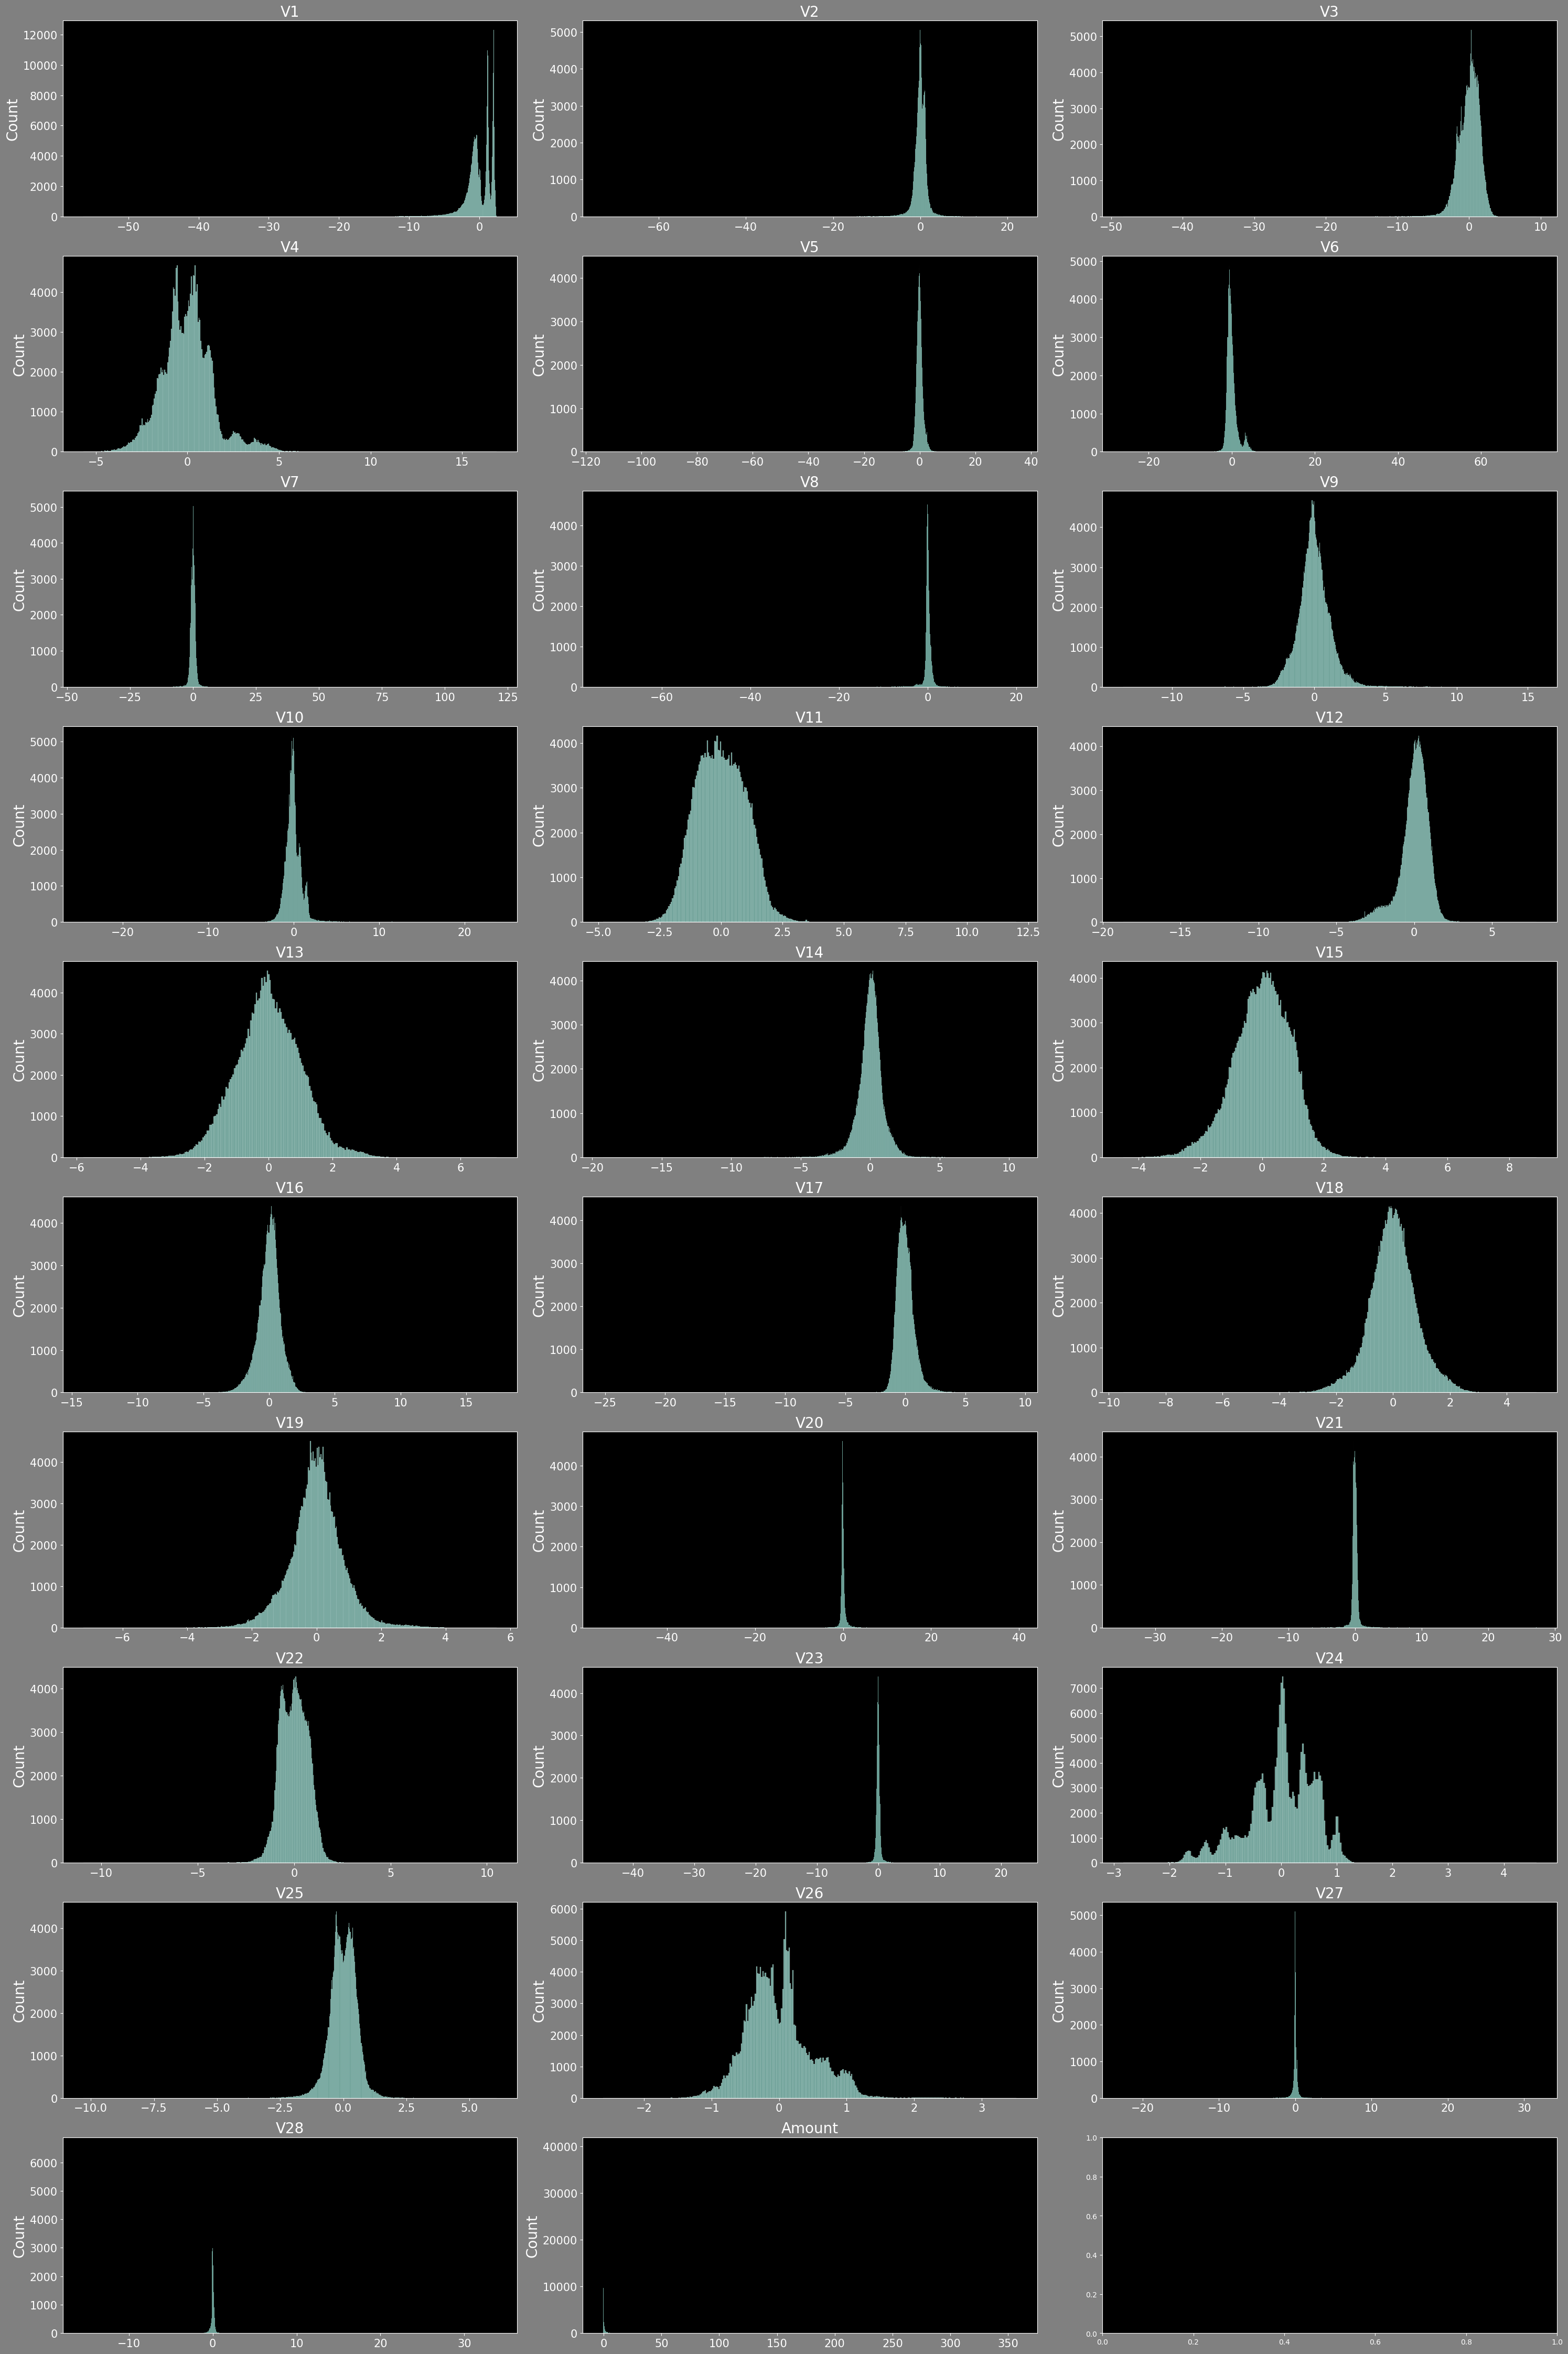

In [ ]:

var = X_train.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='grey')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20)
            ax.set_ylabel("Count", fontsize=20)
            ax.tick_params(axis='both', labelsize=15)
            ax.set_xlabel('')

    plt.tight_layout()
    plt.show()

In [ ]:
# Filtrage des caractéristiques dont l'asymétrie est inférieure à -1 et supérieure à +1
"""
This is a good way to identify which features may need to be transformed to improve model performance.
"""
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

# Random Oversampling

In [ ]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Definition du randomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Rééchantillonner les données d'entraînement à l'aide de RandomOverSampler
X_ros_train_pt, y_ros_train_pt = ros.fit_resample(X_train_pt, y_train_pt)

In [ ]:
print(y_ros_train_pt.value_counts())


Class
0    227451
1    227451
Name: count, dtype: int64


1. Logistic Regression


#1-Trouver une plage appropriée pour un hyperparamètre unique afin de restreindre la plage de paramètres à l'aide de la visualisation

In [ ]:
# # application de la cross validation on the X_train & y_train
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 1.8264219760894775 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 1.8591639995574951 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 1.6363747119903564 seconds
ROC-AUC Score for val data = 0.9884570206688178
Mean precision val score: 0.9719682815760794
Mean recall val score: 0.9294177647053652
Mean f1 val score: 0.9502161739812224
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 1.5956573486328125 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  7593

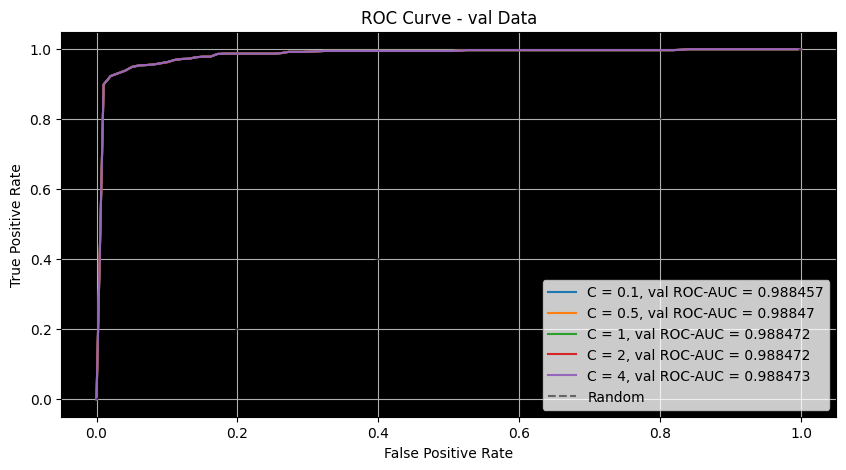

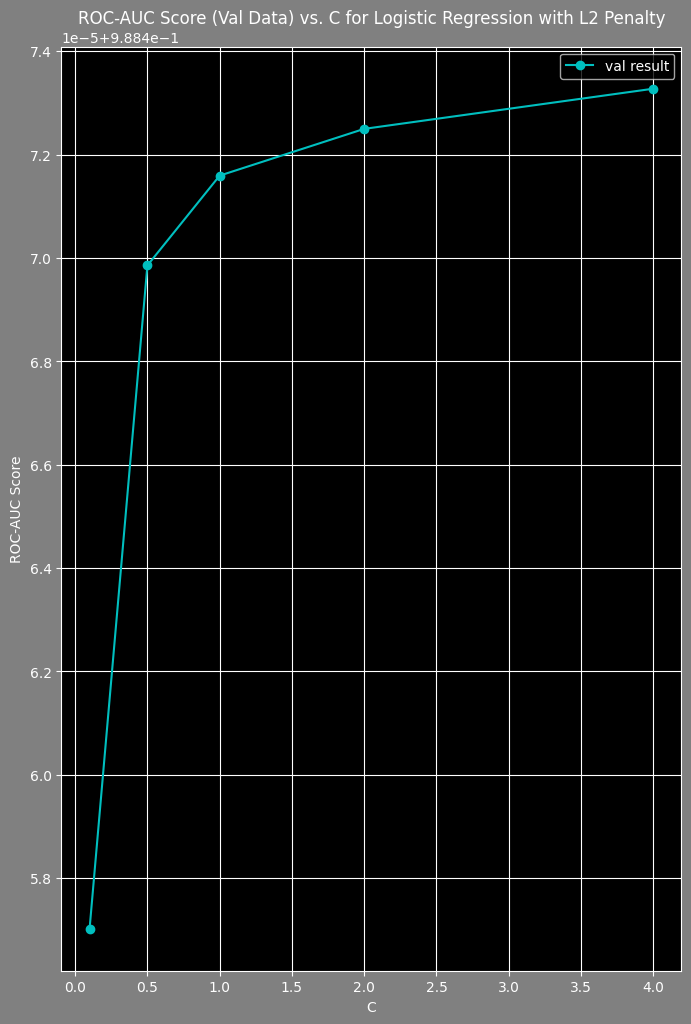

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from numpy import interp
import time

print("======================================Classificateur de régression logistique :=======================================")

# Définissez vos valeurs de C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialisez les listes pour stocker les scores moyens de ROC-AUC et les taux moyens de faux positifs pour les données de validation
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='white')
ax2.set_facecolor('black')

# Boucle à travers chaque valeur de C
for c in C_values:
    print("C =", c, "Pénalité = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Effectuer la validation croisée
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        # Initialiser le classificateur de régression logistique
        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        # Prédictions pour les données de validation
        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        # Calcul des métriques binaires
        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        # Courbes ROC pour les données de validation
        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Temps écoulé :", elapsed_time, "secondes")

    # Calcul des scores moyens ROC-AUC pour les données de validation
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val.append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("Score ROC-AUC pour les données de validation =", mean_roc_auc_val)
    print("Score moyen de précision pour la validation :", mean_precision_val)
    print("Score moyen de rappel pour la validation :", mean_recall_val)
    print("Score moyen F1 pour la validation :", mean_f1_val)

    # Tracer la courbe ROC pour la valeur actuelle de C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', ROC-AUC val = ' + str(round(mean_roc_auc_val, 6)))


print("======================================Tracé de la courbe ROC AUC :===========================================")

# Tracer la courbe ROC pour le classificateur de régression logistique pour les données de validation
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Aléatoire', alpha=0.5)
ax2.set_xlabel('Taux de faux positifs')
ax2.set_ylabel('Taux de vrais positifs')
ax2.set_title('Courbe ROC - Données de validation')
ax2.legend(loc="lower right")
ax2.grid(True)  # Ajouter une grille au graphique

# Afficher le graphique
plt.show()

# Définir le style et la taille de la figure
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='grey')

    # Tracer les scores ROC-AUC en fonction de C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('Score ROC-AUC')
    plt.title('Score ROC-AUC (Données de validation) vs. C pour la régression logistique avec pénalité L2')
    plt.legend(['Résultat validation'], loc='upper right')
    plt.grid()

    plt.show()


In [ ]:
# Imprimer les scores moyens de ROC-AUC pour les données de validation pour toutes les valeurs de C
print("Scores moyens ROC-AUC pour les données de validation pour toutes les valeurs de C : \n", mean_roc_auc_scores_val)

# Trouver l'indice du score moyen ROC-AUC maximum pour les données de validation
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

# Imprimer les résultats pour la meilleure valeur de C
print("Meilleur C :", best_c)
print("Meilleur score moyen ROC-AUC pour les données de validation :", best_mean_roc_auc)
print("Score moyen de précision pour les données de validation avec le meilleur C :", mean_precision_scores_val[best_index])
print("Score moyen de rappel pour les données de validation avec le meilleur C :", mean_recall_scores_val[best_index])
print("Score moyen F1 pour les données de validation avec le meilleur C :", mean_f1_scores_val[best_index])



Mean ROC-AUC scores for val data for all values of C: 
 [0.9884570206688178, 0.9884698547053646, 0.9884715924034748, 0.9884724972057043, 0.9884732739682413]
Best C: 4
Best Mean ROC-AUC score for val data: 0.9884732739682413
Mean precision val score for best C 0.9719237800932539
Mean recall val score for best C 0.9294177647053652
Mean f1 val score for best C 0.9501948437237896


#2-Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Définir les paramètres pour la régression logistique avec validation croisée stratifiée (Stratified K-fold)
params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Définir le classificateur de régression logistique
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Créer un objet GridSearchCV avec une validation croisée stratifiée
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

# Ajuster l'objet GridSearchCV et effectuer l'optimisation des hyperparamètres sur les données rééchantillonnées
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Temps écoulé : {:.2f} secondes".format(end_time - start_time))

# Imprimer le résultat de l'évaluation en choisissant une métrique d'évaluation
print('Meilleur score ROC AUC : ', model_GridSearch.best_score_)

# Imprimer la valeur optimale des hyperparamètres
print('Meilleurs hyperparamètres : ', model_GridSearch.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 29.15 seconds
Best ROC AUC score:  0.9884785535469498
Best hyperparameters:  {'C': 4, 'penalty': 'l2'}


In [ ]:
cv_results = model_GridSearch.cv_results_

# Imprimer les scores moyens des tests pour chaque combinaison d'hyperparamètres
print("Scores moyens des tests :")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Imprimer le classement de chaque combinaison d'hyperparamètres basé sur le score moyen des tests
print("\nClassement de chaque combinaison d'hyperparamètres :")
for rank, params in enumerate(cv_results["params"]):
    print(rank + 1, params)

# Imprimer l'écart type des scores de test pour chaque combinaison d'hyperparamètres
print("\nÉcart type des scores de test :")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.988315224479844
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9884612939355678
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9884752240510316
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9884769617491417
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9884778665513713
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9884785535469498

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 8.983396510788183e-05
{'C'

# XGBoost et Régression logistique

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 4.539785385131836 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 4.492876768112183 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 7.618916034698486 seconds
ROC-AUC Score for val data = 0.9804470626389691
Mean precision val score: 0.9758758219562821
Mean recall val score: 0.9195694896922854
Mean f1 val score: 0.9468761197003941
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 

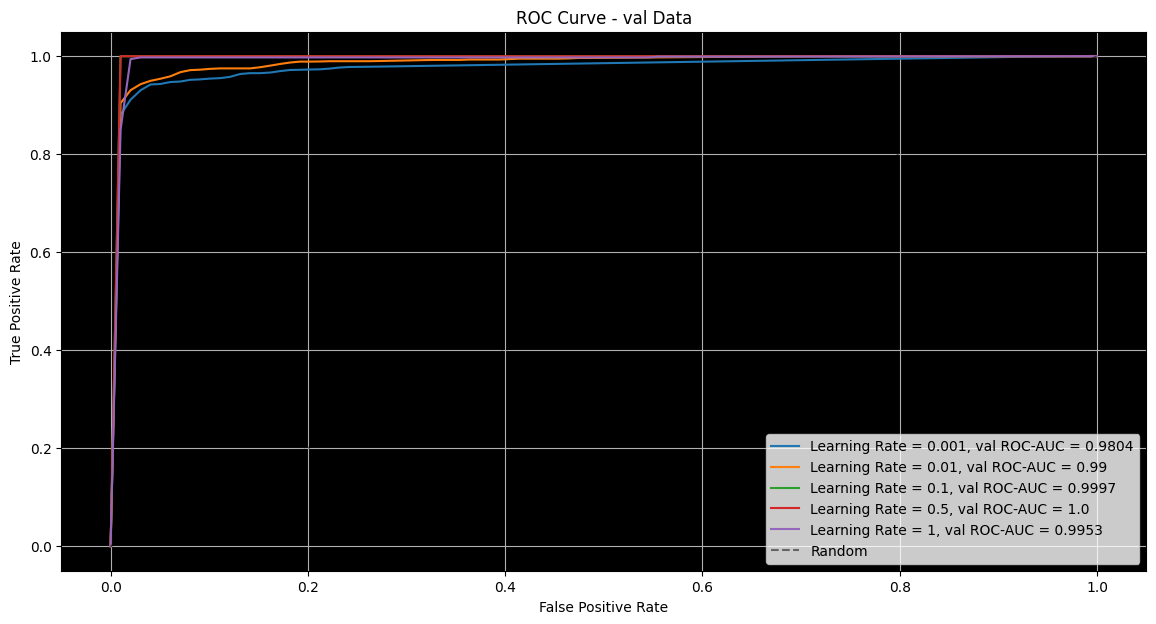

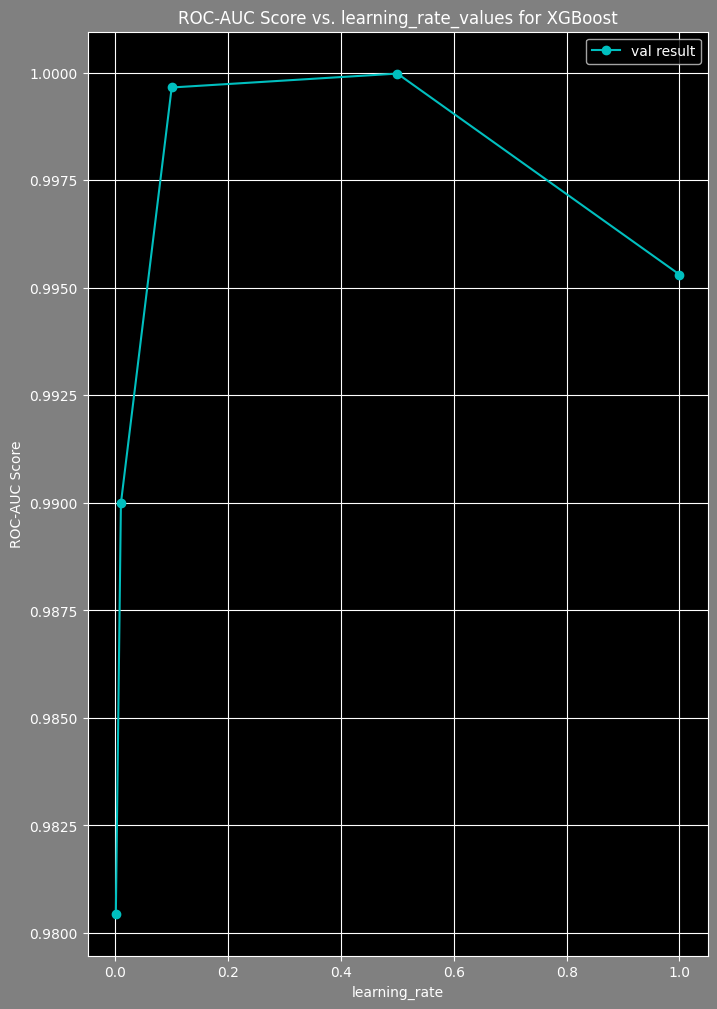

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from numpy import interp
import xgboost as xgb
import time  # Pour mesurer le temps d'exécution

print("============================================ Classificateur XGBoost =============================================")

# Définir les valeurs de "learning_rate" (taux d'apprentissage) à tester
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialiser des listes pour stocker les résultats moyens des métriques
mean_roc_auc_scores_val = []  # Scores moyens ROC-AUC pour les données de validation
mean_precision_scores_val = []  # Scores moyens de précision
mean_recall_scores_val = []  # Scores moyens de rappel
mean_f1_scores_val = []  # Scores moyens de F1
mean_fpr = np.linspace(0, 1, 100)  # Points fixes pour la moyenne des courbes ROC

# Créer une figure pour tracer les courbes ROC
fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='white')  # Couleur de fond blanche
ax2.set_facecolor('black')  # Couleur de fond noire pour les sous-graphiques

# Boucle sur chaque valeur de learning_rate
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)

    # Initialiser des listes pour stocker les résultats de la validation croisée
    cv_scores_val = []  # Scores ROC-AUC pour chaque pli
    precision_val = []  # Précision pour chaque pli
    recall_val = []  # Rappel pour chaque pli
    f1_val = []  # F1 pour chaque pli
    fprs_val = []  # FPR pour chaque pli (False Positive Rate)
    tprs_val = []  # TPR pour chaque pli (True Positive Rate)

    # Validation croisée stratifiée
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)

        # Diviser les données en ensembles d'entraînement et de validation
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        # Initialiser et entraîner le classificateur XGBoost
        xgb_classifier = xgb.XGBClassifier(
            learning_rate=learning_rate,
            n_estimators=100,
            max_depth=3,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            objective='binary:logistic',
            reg_alpha=0.005,
            reg_lambda=1,
            random_state=42
        )
        xgb_classifier.fit(X_train_cv, y_train_cv)

        # Prédire les probabilités sur l'ensemble de validation
        y_val_pred = xgb_classifier.predict_proba(X_val_cv)

        # Calculer le score ROC-AUC pour les données de validation
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        # Convertir les probabilités en prédictions binaires
        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        # Calculer d'autres métriques : précision, rappel, F1
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        # Calculer la courbe ROC
        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))  # Interpolation pour aligner les courbes
        tprs_val[-1][0] = 0.0  # Début de la courbe à (0, 0)
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Temps écoulé :", elapsed_time, "secondes")

    # Calculer les moyennes des scores pour les données de validation
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val.append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    # Afficher les résultats pour cette valeur de learning_rate
    print("ROC-AUC Score pour les données de validation =", mean_roc_auc_val)
    print("Score moyen de précision :", mean_precision_val)
    print("Score moyen de rappel :", mean_recall_val)
    print("Score moyen de F1 :", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Tracer la courbe ROC pour cette valeur de learning_rate
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0),
             label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))

print("====================================== Tracé des courbes ROC AUC ============================================")
print("\n")

# Tracer la courbe ROC pour un classificateur aléatoire
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Configurer les axes et le titre
ax2.set_xlabel('Taux de Faux Positifs (FPR)')
ax2.set_ylabel('Taux de Vrais Positifs (TPR)')
ax2.set_title('Courbe ROC - Données de Validation')
ax2.legend(loc="lower right")
ax2.grid(True)  # Ajouter une grille au graphique

# Afficher la courbe
plt.show()

print("============================================================================================================")

# Tracer la variation de ROC-AUC en fonction des learning_rates
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='grey')

    # Tracer les scores ROC-AUC moyens pour chaque learning_rate
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values pour XGBoost')
    plt.legend(['Résultats de validation'], loc='upper right')
    plt.grid()

    # Afficher le graphique
    plt.show()


In [ ]:
# Afficher les scores moyens ROC-AUC pour les données de validation pour toutes les valeurs de learning_rate
print("Scores moyens ROC-AUC pour les données de validation pour toutes les valeurs de Learning Rate : \n", mean_roc_auc_scores_val)

# Trouver l'indice du meilleur score moyen ROC-AUC pour les données de validation
best_index = np.argmax(mean_roc_auc_scores_val)  # Renvoie l'indice de la valeur maximale
best_learning_rate = learning_rate_values[best_index]  # Récupère le learning_rate correspondant
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]  # Récupère le score ROC-AUC correspondant

# Afficher le meilleur learning_rate et les scores associés
print("Meilleur Learning Rate :", best_learning_rate)
print("Meilleur score moyen ROC-AUC pour les données de validation :", best_mean_roc_auc)
print("Score moyen de précision pour le meilleur Learning Rate :", mean_precision_scores_val[best_index])
print("Score moyen de rappel pour le meilleur Learning Rate :", mean_recall_scores_val[best_index])
print("Score moyen de F1 pour le meilleur Learning Rate :", mean_f1_scores_val[best_index])


Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9804470626389691, 0.9899882045851379, 0.9996549632698377, 0.9999783411697792, 0.9953057460476566]
Best Learning Rate : 0.5
Best Mean ROC-AUC score for val data: 0.9999783411697792
Mean precision val score for best Learning Rate: 0.9994814881459081
Mean recall val score for best Learning Rate: 1.0
Mean f1 val score for best Learning Rate: 0.9997406737915342


In [ ]:
import time  # Pour mesurer le temps d'exécution
import xgboost as xgb  # Importation du module XGBoost pour le classificateur
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # Pour la recherche d'hyperparamètres et la validation croisée

# Définir les hyperparamètres à tester dans la recherche par grille
params = {
    'learning_rate': [0.1, 0.2],  # Taux d'apprentissage à tester
    'max_depth': [3, 5],          # Profondeur maximale de l'arbre
    'subsample': [0.5],           # Fraction d'échantillons utilisée pour former chaque arbre
}

# Définir le classificateur XGBoost
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # Objectif : classification binaire
    eval_metric='auc'             # Métrique d'évaluation : AUC (Area Under Curve)
)

# Mesurer le temps de début de l'exécution
start_time = time.time()

# Créer un objet GridSearchCV avec validation croisée stratifiée
model_GridSearch = GridSearchCV(
    estimator=xgb_classifier,     # Modèle XGBoost
    param_grid=params,            # Hyperparamètres à tester
    scoring='roc_auc',            # Critère d'évaluation basé sur la métrique AUC
    cv=skf,                       # Validation croisée avec Stratified K-Fold
    n_jobs=-1,                    # Utilisation de tous les cœurs disponibles pour paralléliser
    verbose=1,                    # Niveau de verbosité pour afficher la progression
    return_train_score=True       # Conserver les scores sur les données d'entraînement
)

# Ajuster le modèle avec les données ré-échantillonnées
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

# Mesurer le temps de fin d'exécution
end_time = time.time()
print("Temps écoulé : {:.2f} secondes".format(end_time - start_time))

# Afficher le meilleur score ROC AUC obtenu
print('Meilleur score ROC AUC : ', model_GridSearch.best_score_)

# Afficher les meilleurs hyperparamètres trouvés
print('Meilleurs hyperparamètres : ', model_GridSearch.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Time taken: 83.66 seconds
Best ROC AUC score:  0.99998329899657
Best hyperparameters:  {'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.5}


In [ ]:
# Extraire les résultats complets de la recherche par grille
cv_results = model_GridSearch.cv_results_

# Afficher les scores moyens des tests pour chaque combinaison d'hyperparamètres
print("Scores moyens des tests :")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)  # Afficher les hyperparamètres et leur score moyen

# Afficher le rang de chaque combinaison d'hyperparamètres en fonction du score moyen des tests
print("\nClassement de chaque combinaison d'hyperparamètres :")
for rank, params in enumerate(cv_results["params"]):
    print(rank + 1, params)  # Afficher le rang (1 étant le meilleur) et les hyperparamètres correspondants

# Afficher l'écart-type des scores de test pour chaque combinaison d'hyperparamètres
print("\nÉcart-type des scores des tests :")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)  # Afficher les hyperparamètres et leur écart-type


Mean test scores:
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 0.9996699325480236
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 0.9999472362228383
{'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.5} 0.9999057664685843
{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.5} 0.99998329899657

Rank of each hyperparameter combination:
1 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
2 {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}
3 {'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.5}
4 {'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.5}

Standard deviation of test scores:
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 4.883286687320217e-05
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 2.5933161759682903e-05
{'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.5} 3.40554720390788e-05
{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.5} 1.1477594935503721e-05


#Les predictions sur le test


In [ ]:
X_test_saved.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.000000
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.850000
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.070000
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.990000
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.500000


In [ ]:
y_test_saved.head()

,Class
263020,0
11378,0
147283,0
219439,0
36939,0


In [ ]:

scaler = RobustScaler()


X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [ ]:
X_test_saved.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.014079
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.142897
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.761228
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.295791
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.288610


In [ ]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_test_saved_ros, y_test_saved_ros = ros.fit_resample(X_test_saved,y_test_saved)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
results=[]

# intialisation avec le meilleur hyperparamètre
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))


model_results = {
    'Model': 'LogisticRegression',
    'ROC-AUC Score': roc_auc,
    'F1-Score': f1,
    'Precision': preci_sion,
    'Recall': re_call,

}
# Append the dictionary to the results list
results.append(model_results)



LogisticRegression ROC-AUC Score on Test Set = 0.9714243158290143
LogisticRegression F1-Score on Test Set = 0.9318788725019636
LogisticRegression Precision on Test Set = 0.9249211793645844
LogisticRegression Recall on Test Set = 0.9389420371412492
Time taken: 2.13 seconds


In [ ]:

start_time = time.time()
clf = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5, objective='binary:logistic', eval_metric='auc')
clf.fit(X_ros_train_pt, y_ros_train_pt)
# prediction sur le test
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calcul du  the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calcul du F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# affichage des résultats
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))




model_results = {
    'Model': 'XGBClassifier',
    'ROC-AUC Score': roc_auc,
    'F1-Score': f1,
    'Precision': preci_sion,
    'Recall': re_call,

}


results.append(model_results)

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9779550406877162
XGBOOST Classifier F1-Score on Test Set = 0.9376262018117486
XGBOOST Classifier Precision on Test Set = 0.9905280050099808
XGBOOST Classifier Recall on Test Set = 0.8900886325267304
Time taken: 8.74 seconds


Basé sur les scores ROC-AUC : Les scores des modèles XGBClassifier augmentent après un suréchantillonnage. Le score de LogisticRegression a diminué. Cependant, le meilleur modèle est XGBClassifier.

Basé sur les scores F1 : Les scores des modèles LogisticRegression et XGBClassifier augmentent après un suréchantillonnage. Le meilleur modèle est XGBClassifier.

In [ ]:
import pandas as pd

# Convert results to a DataFrame
results
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)

                Model  ROC-AUC Score  F1-Score  Precision   Recall
0  LogisticRegression       0.971424  0.931879   0.924921 0.938942
1       XGBClassifier       0.977955  0.937626   0.990528 0.890089


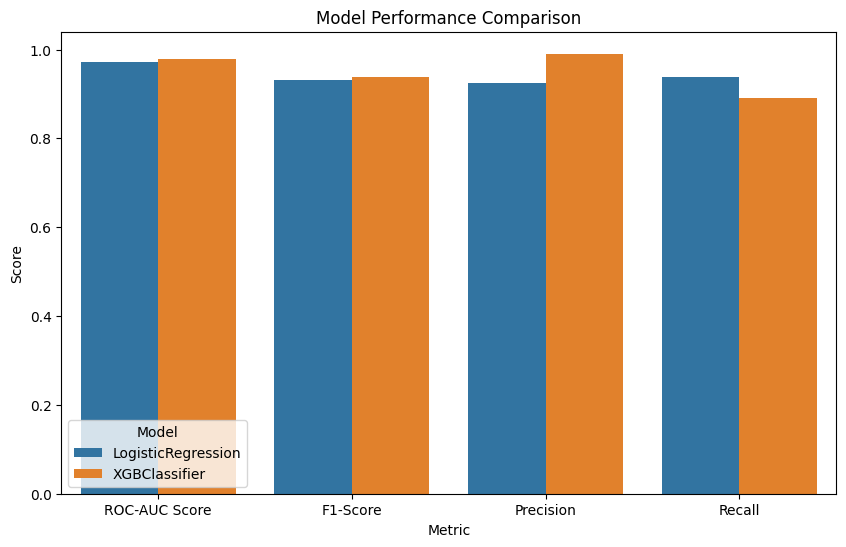

In [ ]:
# Melt the DataFrame for easier plotting
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a barplot with seaborn
sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model")

# Add title and labels
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")

# Show the plot
plt.legend(title="Model", loc='lower left')
plt.show()